In [1]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Python: {}'.format(scipy.version))
import numpy
print('Python: {}'.format(numpy.version))
import matplotlib
print('Python: {}'.format(matplotlib))
import pandas
print('Python: {}'.format(pandas))
import sklearn
print('Python: {}'.format(sklearn))


Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
Python: <module 'scipy.version' from 'C:\\Users\\User\\surfinteg\\Lib\\site-packages\\scipy\\version.py'>
Python: <module 'numpy.version' from 'C:\\Users\\User\\surfinteg\\Lib\\site-packages\\numpy\\version.py'>
Python: <module 'matplotlib' from 'C:\\Users\\User\\surfinteg\\Lib\\site-packages\\matplotlib\\__init__.py'>
Python: <module 'pandas' from 'C:\\Users\\User\\surfinteg\\Lib\\site-packages\\pandas\\__init__.py'>
Python: <module 'sklearn' from 'C:\\Users\\User\\surfinteg\\Lib\\site-packages\\sklearn\\__init__.py'>


In [2]:
from pandas import read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
from pandas import read_excel

url = "D:\\Nazla_Innaya\\S2\\Kuliah\\Sem3\\Studi_Mandiri_II_FI6092\\1_5_bola\\1_5_bola.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

print(len(dataset))

1701


In [4]:
import sklearn
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.2.


In [5]:
import matplotlib.pyplot as plt

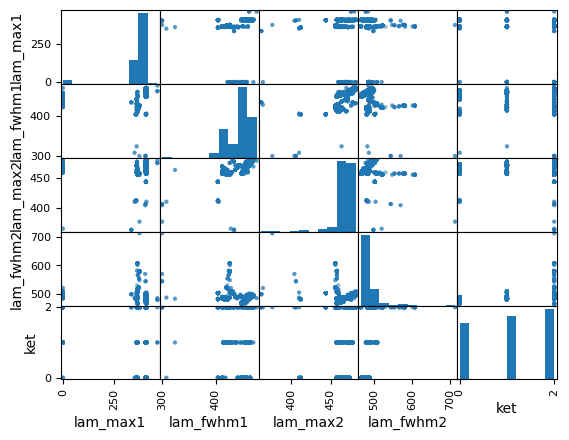

In [6]:
# Load dataset
from pandas import read_excel

url = "D:\\Nazla_Innaya\\S2\\Kuliah\\Sem3\\Studi_Mandiri_II_FI6092\\1_5_bola\\1_5_bola.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

# Scatter plot matrix
import matplotlib.pyplot as plt
#scatter_matrix(dataset[['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','ket']])
scatter_matrix(dataset[['lam_max1', 'lam_fwhm1','lam_max2','lam_fwhm2','ket']])
plt.show()

In [7]:
# Load dataset
from pandas import read_excel

url = "D:\\Nazla_Innaya\\S2\\Kuliah\\Sem3\\Studi_Mandiri_II_FI6092\\1_5_bola\\1_5_bola.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

array = dataset
print(array[:5])
print()

X = array.iloc[:,0:4].values
print(X[:5])
print()

y = array.iloc[:,4].values
print(y[:5])

   lam_max1      csc_max1  lam_min       csc_min  lam_fwhm1         c_mid  \
0       408  2.774638e-14      434  2.264798e-14        464  4.239645e-14   
1       410  2.984472e-14      432  2.725996e-14        464  4.555423e-14   
2       362  2.400898e-14      390  1.436011e-14        442  4.153600e-14   
3       364  2.971955e-14      392  1.702803e-14        412  4.696978e-14   
4       366  3.552294e-14      392  1.962838e-14        412  5.500586e-14   

   lam_max2      csc_max2  lam_fwhm2  fwhm  ...  posisi2  posisi3  posisi4  \
0       474  6.214492e-14        484    20  ...        0        0        0   
1       474  6.384849e-14        484    20  ...        0        0        0   
2       472  6.871189e-14        488    46  ...        0        0        0   
3       470  7.691152e-14        488    76  ...        0        0        0   
4       462  9.038334e-14        488    76  ...        0        0        0   

   posisi5  arah_k  arah_E  sb_putar  sudut1  sudut2  ket  
0       

In [30]:
# Split-out validation dataset
array = dataset
X = array.iloc[:,0:10].values
y = array.iloc[:,20].values
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.50
    #random_state=2
)

print(len(Y_train))
print(len(Y_validation))
print(len(Y_validation)/(len(Y_train) + len(Y_validation)))
                                                                

850
851
0.5002939447383892


In [31]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    


LR: 0.632941 (0.018824)
LDA: 0.762353 (0.028235)
KNN: 0.874118 (0.001176)
CART: 0.923529 (0.003529)
NB: 0.618824 (0.032941)
SVM: 0.915294 (0.004706)


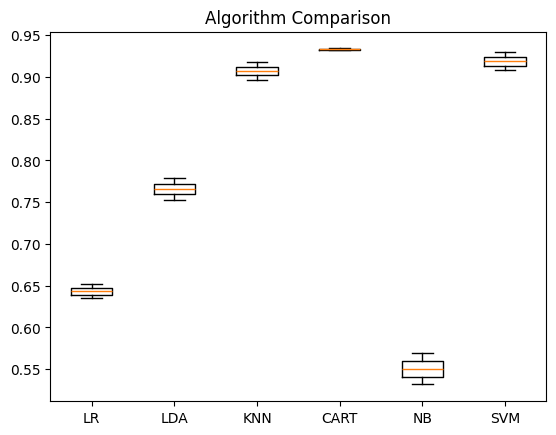

In [18]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [32]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [33]:
print(Y_validation)

[2 0 2 0 2 0 0 1 1 1 0 0 1 1 0 2 2 0 2 1 2 0 2 2 0 1 2 2 2 2 2 0 2 1 0 0 2
 0 2 0 1 1 2 2 1 2 1 2 1 2 1 0 2 2 0 1 0 2 0 2 0 1 2 1 0 1 0 2 0 0 1 2 0 2
 0 0 2 1 1 1 1 1 0 0 0 1 2 0 1 0 2 0 0 1 0 0 0 2 2 0 0 1 0 2 0 1 2 0 0 2 0
 1 1 0 1 1 0 0 0 1 1 2 2 2 2 0 2 1 0 2 2 1 0 2 2 1 2 1 0 1 0 2 1 1 1 2 2 2
 0 1 2 1 1 1 1 2 1 0 2 0 1 1 1 2 0 2 0 0 1 2 1 0 0 0 0 2 2 1 0 0 1 0 2 0 0
 2 2 2 1 0 2 0 1 2 2 2 2 0 1 2 0 1 0 2 2 0 1 2 2 2 0 2 0 1 0 2 1 2 1 0 2 0
 2 2 1 1 0 2 1 2 2 0 0 2 1 1 0 2 0 1 0 0 2 2 0 0 1 0 0 1 1 0 0 1 1 2 1 0 1
 2 2 1 0 1 0 2 1 0 1 1 1 1 2 1 2 2 1 2 2 1 2 2 0 2 0 1 0 2 0 0 1 2 2 1 2 0
 1 0 2 2 1 2 1 2 0 2 2 1 1 1 2 1 1 1 2 2 2 2 1 1 1 2 1 1 2 0 0 2 2 1 2 1 2
 1 0 2 2 0 2 0 1 1 2 2 1 0 0 0 1 0 2 1 2 0 1 2 2 2 0 0 2 1 2 2 1 0 2 0 2 2
 2 2 2 2 2 0 1 1 0 1 0 2 1 2 2 1 0 1 2 0 1 2 0 2 0 1 2 2 1 1 0 2 2 2 1 0 2
 1 1 0 2 0 0 2 2 1 1 2 1 1 0 1 2 1 2 1 1 2 0 0 1 2 1 1 0 2 0 1 1 0 1 1 1 0
 2 2 1 2 2 2 2 0 0 1 2 1 2 1 1 1 1 0 0 0 1 1 2 1 1 1 2 2 2 0 2 0 0 0 1 1 1
 2 0 0 1 2 1 1 2 0 0 1 1 

In [34]:
print(predictions)

[2 0 2 0 2 0 0 1 1 1 0 0 1 1 0 2 0 2 2 1 2 0 2 0 0 1 2 2 2 2 2 0 2 1 0 0 2
 0 2 0 1 1 2 2 1 2 1 2 1 2 1 2 2 2 0 1 0 2 0 0 0 1 2 1 0 1 0 2 0 0 1 2 0 2
 0 0 2 1 1 1 1 1 0 0 2 2 2 0 1 0 2 0 0 1 0 0 0 0 2 0 0 1 0 2 0 1 2 0 0 2 0
 1 1 0 1 1 0 2 0 1 1 2 2 2 2 0 2 1 0 2 2 1 0 2 2 1 0 1 0 1 2 2 1 1 1 0 2 2
 0 1 2 1 1 1 1 2 1 0 2 0 1 1 1 2 0 2 0 0 1 2 1 0 0 0 0 2 2 1 0 0 1 0 2 0 0
 2 2 2 1 0 2 0 1 2 2 2 2 2 1 2 0 1 0 2 2 0 1 2 2 2 0 2 0 1 0 2 1 2 1 0 2 0
 2 2 1 1 0 2 1 2 2 0 2 2 1 1 0 2 0 1 0 0 2 2 0 0 1 0 0 1 1 0 0 1 1 2 1 0 1
 2 2 1 0 1 0 2 1 0 1 1 1 2 2 1 2 2 1 2 2 1 2 2 0 2 2 1 0 2 2 0 1 2 2 1 2 0
 1 0 2 2 1 2 1 2 0 2 2 1 1 1 2 1 2 1 2 2 2 2 1 1 1 2 1 1 2 0 0 2 0 1 2 1 2
 1 0 2 0 0 2 0 1 1 2 2 1 0 0 0 1 0 2 1 2 0 1 0 2 2 0 0 2 1 2 2 1 0 2 0 2 2
 2 2 2 2 2 0 1 1 0 1 0 2 1 2 0 1 0 1 2 0 1 2 0 2 0 1 2 2 1 1 0 2 2 2 1 0 2
 1 1 0 2 0 0 2 0 1 1 2 1 1 0 1 2 1 2 1 1 2 0 0 1 2 1 1 0 2 0 1 1 0 1 1 1 0
 2 2 1 2 2 2 2 0 0 1 2 1 2 1 1 1 1 0 0 2 1 1 2 1 1 1 2 2 2 2 2 2 0 0 1 1 1
 2 0 2 1 2 1 1 2 0 2 1 1 

In [35]:
# Evaluate predictions using SVM
print("accurancy = ",
     accuracy_score(
         Y_validation, predictions))
cf = confusion_matrix(Y_validation, predictions)
print("\nconfusion matrix =\n", cf)

print("\nreport = \n", 
     classification_report(
         Y_validation, predictions))

accurancy =  0.9471210340775558

confusion matrix =
 [[240   0  25]
 [  0 265   3]
 [ 17   0 301]]

report = 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       265
           1       1.00      0.99      0.99       268
           2       0.91      0.95      0.93       318

    accuracy                           0.95       851
   macro avg       0.95      0.95      0.95       851
weighted avg       0.95      0.95      0.95       851



In [36]:
# Make predictions using CART
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accurancy = ",
     accuracy_score(
         Y_validation, predictions))
print("\nconfusion matrix =\n",
     confusion_matrix(
         Y_validation, predictions))
print("\nreport = \n", 
     classification_report(
         Y_validation, predictions))

accurancy =  0.9471210340775558

confusion matrix =
 [[240   0  25]
 [  0 266   2]
 [ 17   1 300]]

report = 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       265
           1       1.00      0.99      0.99       268
           2       0.92      0.94      0.93       318

    accuracy                           0.95       851
   macro avg       0.95      0.95      0.95       851
weighted avg       0.95      0.95      0.95       851



In [ ]:
#X = array.iloc[:,0:10].values
#y = array.iloc[:,20].values
X_test1 = array.iloc[90:111,0:10].values
y_test1 = array.iloc[90:111:,20].values
X_test2 = array.iloc[501:527,0:10].values
y_test2 = array.iloc[501:527:,20].values
X_test3 = array.iloc[911:923,0:10].values
y_test3 = array.iloc[911:923:,20].values
X_test4 = array.iloc[1203:1220,0:10].values
y_test4 = array.iloc[1203:1220:,20].values

predictions = model.predict(X_test1)
print(predictions)
print(y_test1)

predictions = model.predict(X_test2)
print(predictions)
print(y_test2)

predictions = model.predict(X_test3)
print(predictions)
print(y_test3)

predictions = model.predict(X_test4)
print(predictions)
print(y_test4)

## test

In [ ]:
url2 = "D:\\Nazla_Innaya\\S2\\Kuliah\\Sem3\\Studi_Mandiri_II_FI6092\\1_5_bola\\tanpabola3.xlsx"
names2 = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset2 = read_excel(url2, names=names2, header=None)

array2 = dataset2
print(len (array2))
X_test5 = array2.iloc[151:157,0:10].values
y_test5 = array2.iloc[151:157:,20].values
X_test6 = array2.iloc[11:17,0:10].values
y_test6 = array2.iloc[11:17:,20].values
X_test7 = array2.iloc[291:301,0:10].values
y_test7 = array2.iloc[291:301:,20].values

predictions = model.predict(X_test5)
print(predictions)
print(y_test5)

predictions = model.predict(X_test6)
print(predictions)
print(y_test6)

predictions = model.predict(X_test7)
print(predictions)
print(y_test7)


In [ ]:
url2 = "D:\\Nazla_Innaya\\S2\\Kuliah\\Sem3\\Studi_Mandiri_II_FI6092\\1_5_bola\\3bola.xlsx"
names2 = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset2 = read_excel(url2, names=names2, header=None)

array2 = dataset2
print(len (array2))
X_test5 = array2.iloc[151:157,0:10].values
y_test5 = array2.iloc[151:157:,20].values
X_test6 = array2.iloc[11:17,0:10].values
y_test6 = array2.iloc[11:17:,20].values
X_test7 = array2.iloc[291:301,0:10].values
y_test7 = array2.iloc[291:301:,20].values

predictions = model.predict(X_test5)
print(predictions)
print(y_test5)

predictions = model.predict(X_test6)
print(predictions)
print(y_test6)

predictions = model.predict(X_test7)
print(predictions)
print(y_test7)


## Data uji 4 bola dengan data latih tanpa 4 bola

In [ ]:
url2 = "D:\\Nazla_Innaya\\S2\\Kuliah\\Sem3\\Studi_Mandiri_II_FI6092\\1_5_bola\\3bola.xlsx"
names2 = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset2 = read_excel(url2, names=names2, header=None)

array2 = dataset2
print(len (array2))
X_test8 = array2.iloc[:,0:10].values
y_test8 = array2.iloc[::,20].values

predictions = model.predict(X_test8)
print(predictions)
print(y_test8)

# Evaluate predictions using SVM
print("accurancy = ",
     accuracy_score(
         y_test8, predictions))
cf = confusion_matrix(y_test8, predictions)
print("\nconfusion matrix =\n", cf)

print("\nreport = \n", 
     classification_report(
         y_test8, predictions))